# Ejercicio final del módulo 2

El punto de partida es la consideración de que existe un gran problema con la vivienda y el turismo de alquiler de AirBnb en ciudades. Vamos a trabajar con un `dataset` para analizar este problema. 

Se sabe que muchos propietarios privados encuentran más rentable y lucrativo alquilar pisos a turistas que a locales (especialmente en los centros de las ciudades), y muchas agencias inmobiliarias compran propiedades y las convierten también en alojamientos turísticos. Todo esto tiene como efecto reducir la oferta, aumentar los precios y empujar a los comercios locales a otros barrios, dejando solo a los turistas en el centro.

Con esto en mente, y sabiendo que Airbnb es hoy en día uno de los mercados en línea más populares para alojamiento, investigaremos los datos para:

- Por un lado evaluar el impacto que tiene Airbnb en la vivienda (en este caso se analiza la ciudad de Madrid).

- Por otro lado indagar sobre quién, cuándo y cómo se alquila y posiblemente hacer consideraciones sobre los flujos turísticos.

In [ ]:
#En el caso de usar Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importar librerias

Pandas, numpy y seaborn

## Solución

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Cargar los anuncios de AirBnb

## Solución

In [7]:
anuncios = pd.read_csv('/content/drive/MyDrive/Curso Data Analytics Upgrade Hub/Contenidos/Módulo 2/Trabajo Módulo 2/datos/airbnb_anuncios.csv')

# Vea el contenido del dataset y analice las columnas

No siempre tendremos una descripción de las columnas. Analícelas con los siguientes comandos: `shape`, `dtypes` e `info`.

## Solución

In [9]:
anuncios.shape
anuncios.dtypes
anuncios.info

(20837, 16)

# Valores duplicados

Analice  los valores duplicados por las columnas.

Use el comando `duplicated` junto con `sum`.

En esta ocasión quite los valores duplicados con `drop_duplicates`.

## Solución

In [12]:
anuncios.duplicated().sum()
anuncios.drop_duplicates(inplace=True)

# Compruebe los valores nulos

Para ello use `isnull` junto con `sum`.

## Solución

In [13]:
anuncios.isnull().sum()

id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

# Limpieza de columnas

Elimine las columnas `nombre`, `id`, `host_name` y `last_review`.

## Solución

In [14]:
anuncios.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

# Análisis de los barrios

Analice la columna `neighbourhood_group` y contee los valores. Use el parámetro `normalize` con valores `True` o `False` para ver su utilidad.

Link de referencia: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

## Solución

In [19]:
anuncios['neighbourhood_group'].value_counts(normalize=True)

Centro                   0.469021
Salamanca                0.065988
Chamberí                 0.063877
Arganzuela               0.053799
Tetuán                   0.040217
Carabanchel              0.032538
Retiro                   0.031914
Latina                   0.029563
Ciudad Lineal            0.029419
Puente de Vallecas       0.028363
Chamartín                0.026443
Moncloa - Aravaca        0.026011
San Blas - Canillejas    0.025148
Usera                    0.017325
Hortaleza                0.015933
Fuencarral - El Pardo    0.014397
Villaverde               0.007967
Barajas                  0.007919
Moratalaz                0.006095
Villa de Vallecas        0.004943
Vicálvaro                0.003119
Name: neighbourhood_group, dtype: float64

# Sección

Descripción `shape`, `dtypes` e `info`.

## Solución

# Tratamiento de la columna `reviews_per_month`

Ponga a 0 aquellos valores nulos de la columna con el comando `fillna`.

## Solución

In [20]:
anuncios.fillna({'reviews_per_month':0}, inplace=True)
anuncios.reviews_per_month.isnull().sum()

0

# Quite aquellos valores nulos de las columnas restantes


## Solución

In [21]:
anuncios.isnull().sum()
anuncios.dropna(how='any',inplace=True)
anuncios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20837 entries, 0 to 20836
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         20837 non-null  int64  
 1   neighbourhood_group             20837 non-null  object 
 2   neighbourhood                   20837 non-null  object 
 3   latitude                        20837 non-null  float64
 4   longitude                       20837 non-null  float64
 5   room_type                       20837 non-null  object 
 6   price                           20837 non-null  int64  
 7   minimum_nights                  20837 non-null  int64  
 8   number_of_reviews               20837 non-null  int64  
 9   reviews_per_month               20837 non-null  float64
 10  calculated_host_listings_count  20837 non-null  int64  
 11  availability_365                20837 non-null  int64  
dtypes: float64(3), int64(6), object(

# Uee el comando `describe` para ver el estado de los datos



## Solución

In [22]:
anuncios.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.083700e+04,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000
mean,1.014144e+08,40.420548,-3.694500,134.065364,4.373614,35.163891,1.521432,12.188559,155.097567
std,8.956078e+07,0.021881,0.027793,381.207575,20.428777,61.863053,1.916618,32.156130,133.746263
min,5.154000e+03,40.319480,-3.890940,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.232182e+07,40.409550,-3.707490,40.000000,1.000000,1.000000,0.070000,1.000000,17.000000
50%,7.574288e+07,40.418900,-3.701180,65.000000,2.000000,8.000000,0.750000,2.000000,123.000000
75%,1.719263e+08,40.429020,-3.689110,100.000000,3.000000,42.000000,2.360000,7.000000,300.000000
max,2.960847e+08,40.573990,-3.527660,9999.000000,1125.000000,594.000000,34.230000,231.000000,365.000000


# Analice la correlación de las variables

Use el comando `corr` y de Seaborn use `heatmap` para respresentarlo.

Importe la librería `matplotlib` para facilitar la representación de los futuros gráficos.

`import matplotlib.pyplot as plt`

 **¿Qué observa con las correlaciones?**

## Solución

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

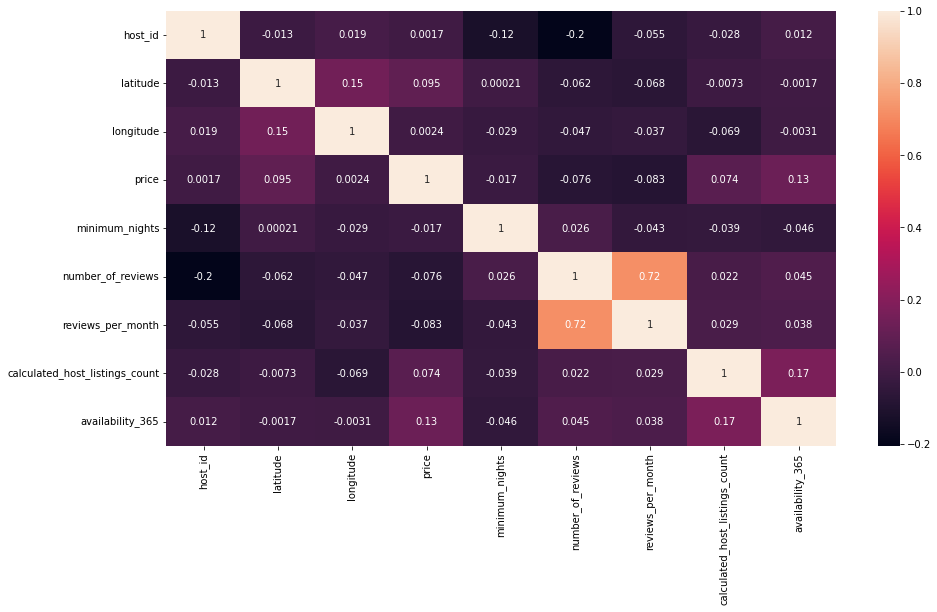

In [27]:
import matplotlib.pyplot as plt
corr = anuncios.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
anuncios.columns

# Identifique los barrios del dataset

Use el comando `unique` en la columna `neighbourhood_group`.

## Solución

In [30]:
anuncios['neighbourhood_group'].unique()


array(['Chamartín', 'Latina', 'Centro', 'Arganzuela', 'Salamanca',
       'Tetuán', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberí',
       'Villaverde', 'Hortaleza', 'Moncloa - Aravaca', 'Carabanchel',
       'Retiro', 'San Blas - Canillejas', 'Villa de Vallecas', 'Barajas',
       'Usera', 'Puente de Vallecas', 'Moratalaz', 'Vicálvaro'],
      dtype=object)

# Represente los barrios y su importancia

Use `countplot` de `Seaborn` en la columna `neighbourhood_group`.

## Solución

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Columna: neighbourhood_group')

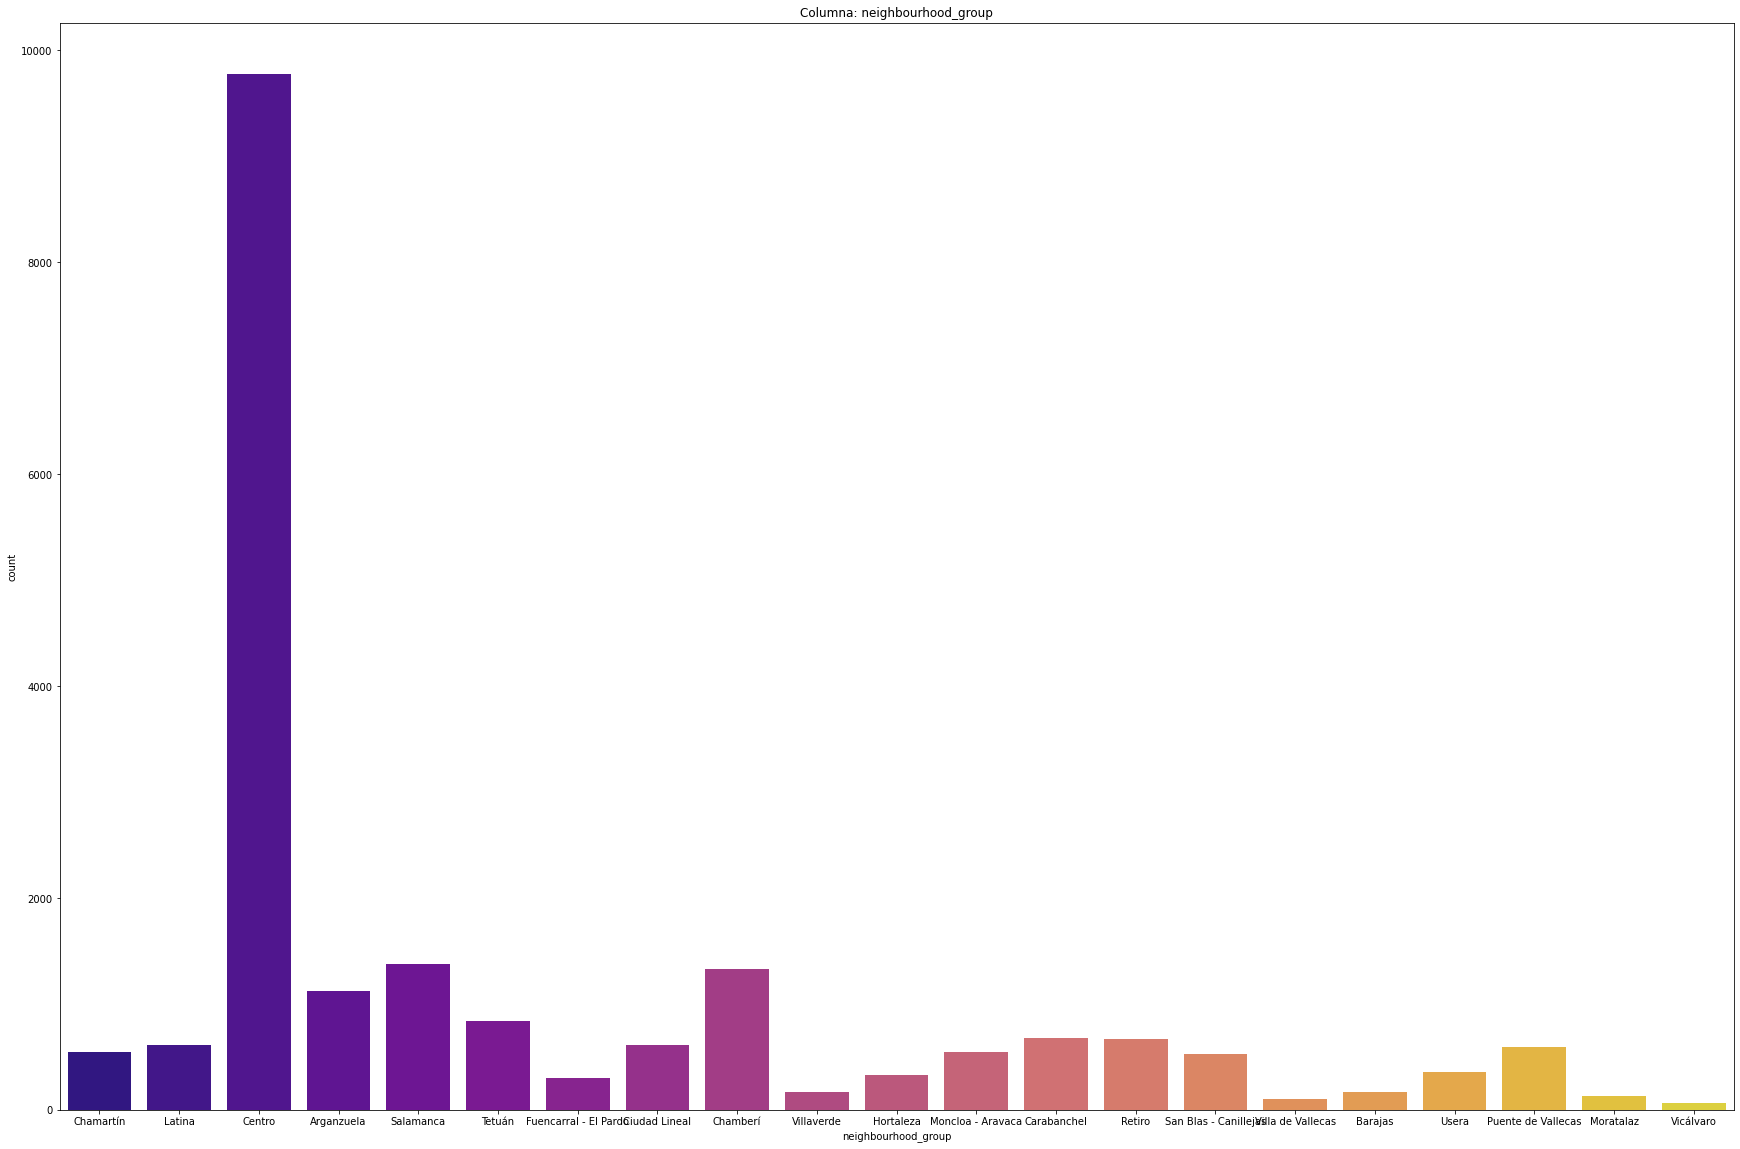

In [39]:
sns.countplot(anuncios['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(30,20)
plt.title('Columna: neighbourhood_group')

# Realice ahora una representación de los barrios por separado y sin agrupar.

Use `countplot` de `Seaborn` en la columna `neighbourhood`.

## Solución

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Columna: neighbourhood')

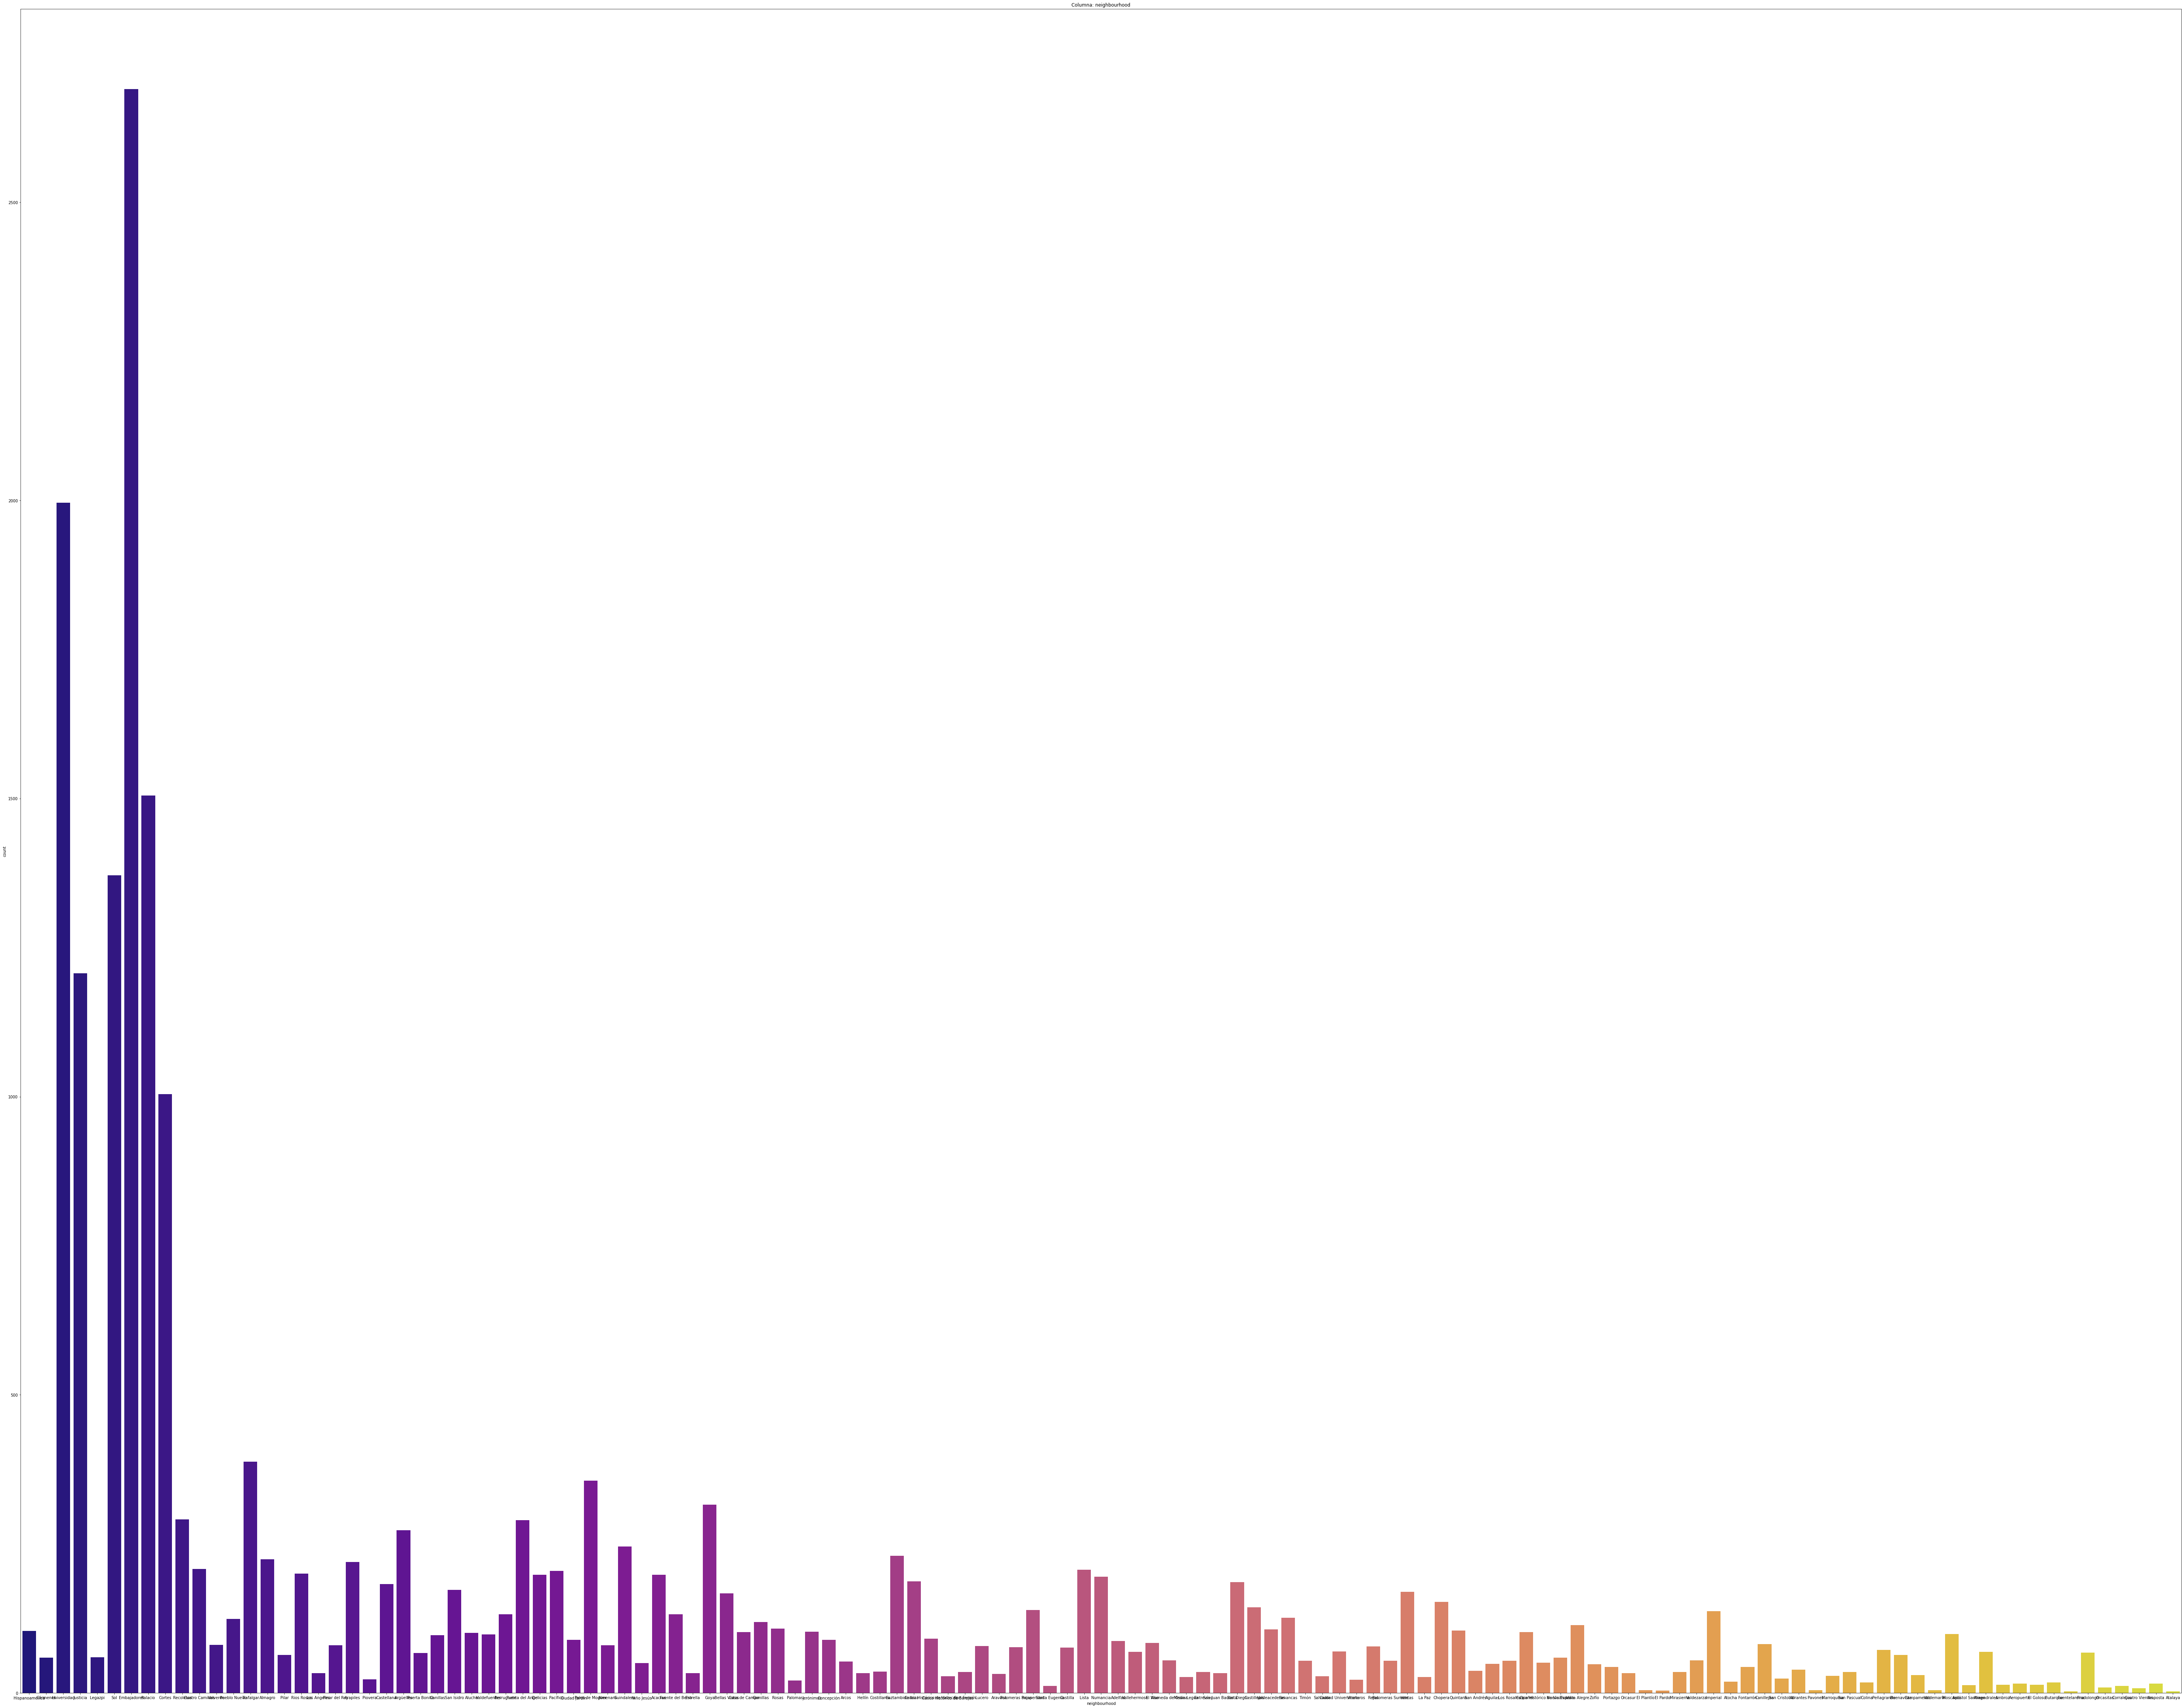

In [41]:
sns.countplot(anuncios['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(100,80)
plt.title('Columna: neighbourhood')

# Represente los tipos de habitación que se ofertan

Use la columna `room_type`.

## Solución

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Tipos de habitaciones más ofertadas')

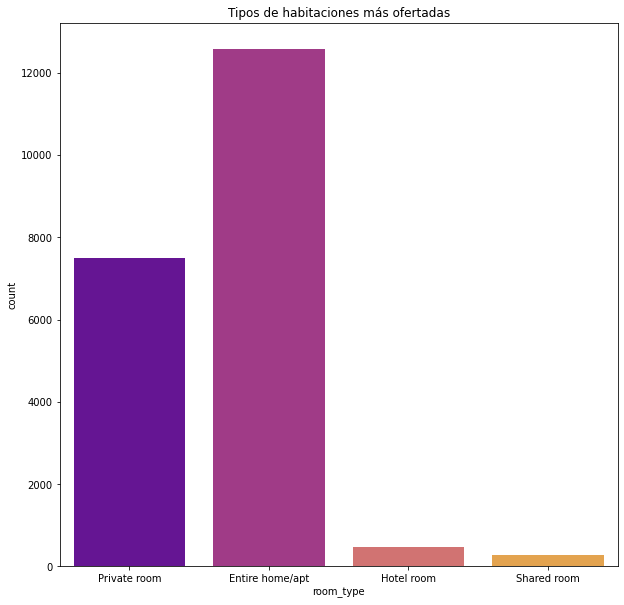

In [42]:
sns.countplot(anuncios['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Tipos de habitaciones más ofertadas')

# Relación entre la columna `neighbour_group` y `availability_365` que corresponde a la disponiblidad

Puede usar un `boxplot` de `sns`.
**¿Qué interpreta?**

## Solución

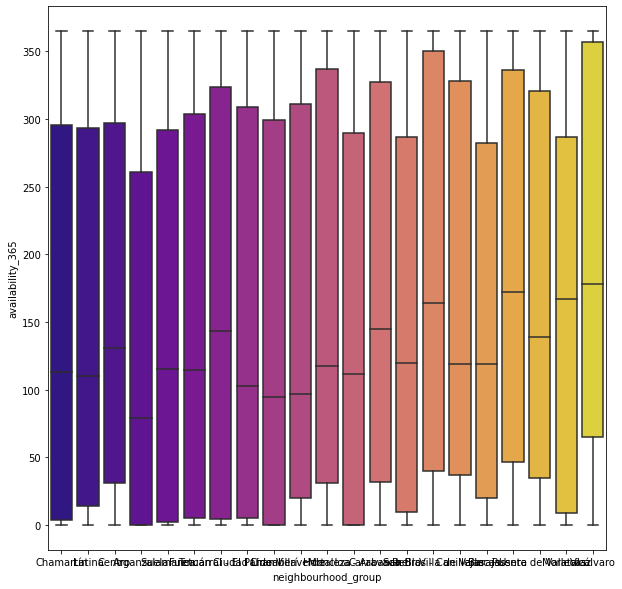

In [43]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=anuncios, x='neighbourhood_group',y='availability_365',palette='plasma')

# Relicemos un mapa de los grupos de barrios

Use un `scatterplot` de `sns`.

Para ello deberá aportar las columnas `longitude`, `latitude` y como `hue` aporte la columna `neighbourhood_group`.

Link de referencia: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## Solución

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


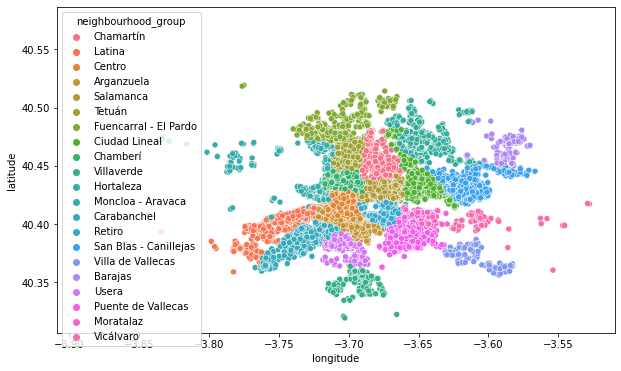

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(anuncios.longitude,anuncios.latitude,hue=anuncios.neighbourhood_group)
plt.ioff()

# Realice el mapa anterior pero esta vez de los barrios

Siguiendo el comando anterior, use la columna `neighbourhood`.

## Solución

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


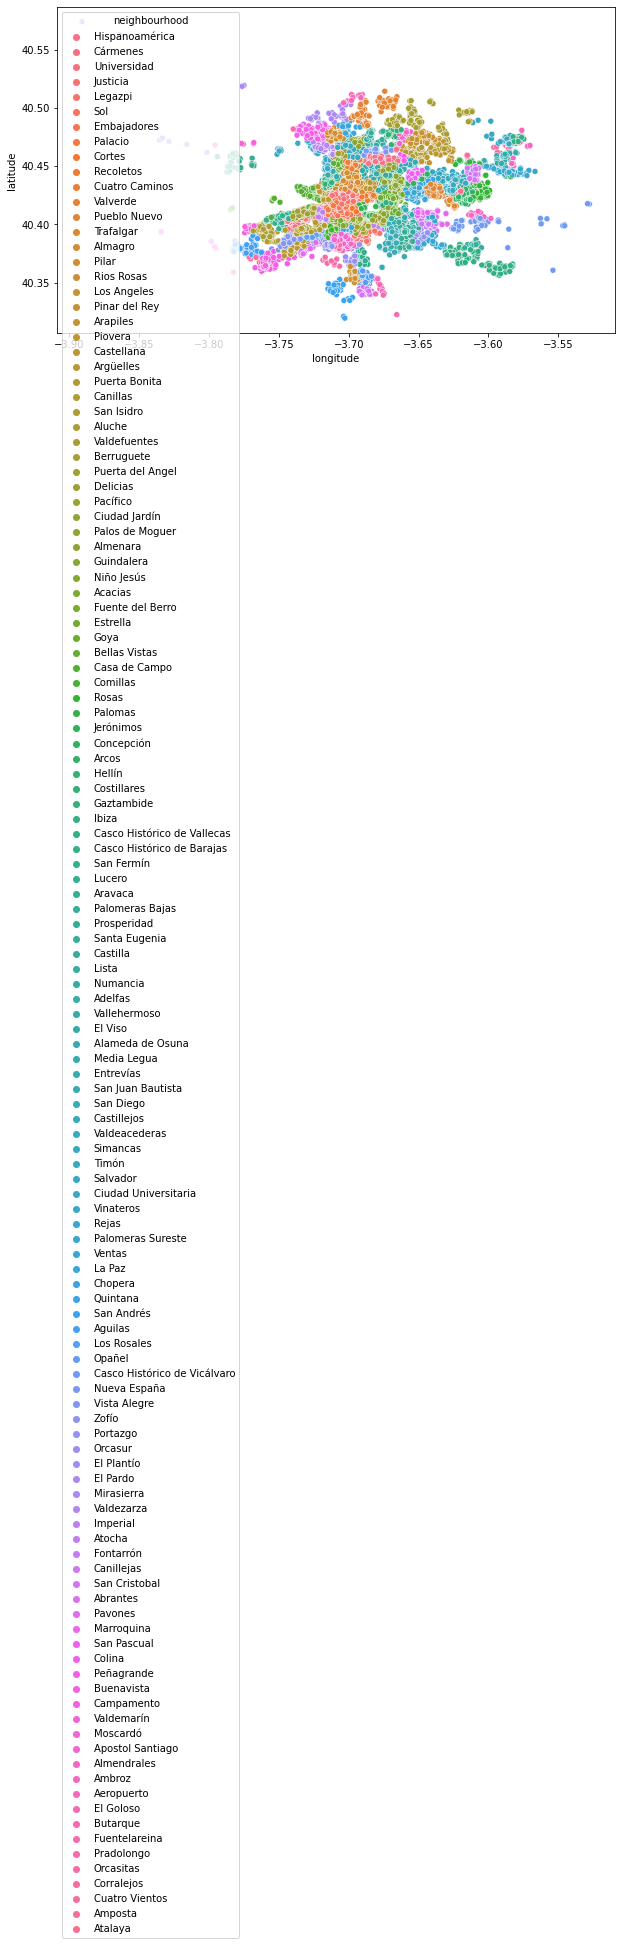

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(anuncios.longitude,anuncios.latitude,hue=anuncios.neighbourhood)
plt.ioff()

# Cree un mapa sobre el tipo de habitación por barrios

Esta vez, use la columna `room_type`.

**¿Qué indica el gráfico?**

## Solución

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


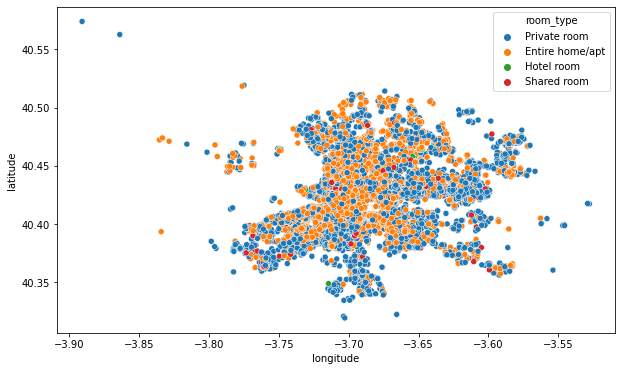

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(anuncios.longitude,anuncios.latitude,hue=anuncios.room_type)
plt.ioff()

# Disponibilidad de las habitaciones

Cree un mapa para ver la disponibilidad de las habitaciones. 

Para ello use la columna `availability_365`.

## Solución

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


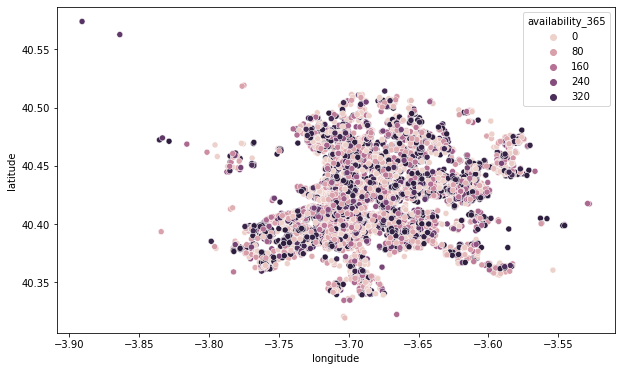

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(anuncios.longitude,anuncios.latitude,hue=anuncios.availability_365)
plt.ioff()

# Sección

Descripción `shape`, `dtypes` e `info`.

## Solución